<div style="display:block">
    <div style="width: 20%; display: inline-block; text-align: left;">
        <img src="http://upload.wikimedia.org/wikipedia/en/0/0c/Mu_Sigma_Logo.jpg" style="height:75px; margin-left:0px" />
    </div>
    <div style="width: 59%; display: inline-block">
        <h1  style="text-align: center">ML using Python: Session 3</h1>
        <div style="width: 100%; text-align: center; display: inline-block;"><i>Author:</i> <strong>Srishti Saha</strong> </div>
    </div>
    <div style="width: 20%; text-align: right; display: inline-block;">
        <div style="width: 100%; text-align: left; display: inline-block;">
            <i>Created: </i>
            <time datetime="2014-03-10" pubdate>16th February 2019</time>
        </div>
    </div>
</div>

# Topics Covered:


## 1. Linear Regression
find link here: [Linear Regression](#Linear-Regression)

## 2. Logistic Regression
find link here: [Logistic Regression](#Logistic-Regression)

## 3. Hierarchical Clustering
find link here: [Hierarchical Clustering](#Hierarchical-Clustering)

In [7]:
import numpy as np
import pandas as pd

# Regression

## Linear Regression

Linear Regression is a linear method to model the relationship between a scalar response (or dependent variable) and one or more explanatory variables (or independent variables). 

Linear regression models are often fitted using the **least squares approach**, but they may also be fitted in other ways, such as by **minimizing the "lack of fit" in some other norm (as with least absolute deviations regression)**, or by **minimizing a penalized version of the least squares cost function** as in ridge regression (L2-norm penalty) and lasso (L1-norm penalty).

### Linear Regression- OLS 
OLS or ordinary least squares (OLS) is a type of **linear least squares method** for estimating the unknown parameters in a linear regression model. OLS chooses the parameters of a linear function of a set of explanatory variables by the principle of least squares: minimizing the sum of the squares of the differences between the observed dependent variable (values of the variable being predicted) in the given dataset and those predicted by the linear function.

The result of this method is a *best-fit line*. A line of best fit is a straight line that is the best approximation of the given set of data.

Additional Reading Material:
1. https://people.revoledu.com/kardi/tutorial/Regression/OLS.html
2. https://www.varsitytutors.com/hotmath/hotmath_help/topics/line-of-best-fit

In [14]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Load the diabetes dataset
diabetes = datasets.load_diabetes()

# Use features
diabetes_X = diabetes.data
print(diabetes_X)

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test = diabetes.target[-20:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(diabetes_y_test, diabetes_y_pred))

[[ 0.03807591  0.05068012  0.06169621 ... -0.00259226  0.01990842
  -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 ... -0.03949338 -0.06832974
  -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 ... -0.00259226  0.00286377
  -0.02593034]
 ...
 [ 0.04170844  0.05068012 -0.01590626 ... -0.01107952 -0.04687948
   0.01549073]
 [-0.04547248 -0.04464164  0.03906215 ...  0.02655962  0.04452837
  -0.02593034]
 [-0.04547248 -0.04464164 -0.0730303  ... -0.03949338 -0.00421986
   0.00306441]]
Coefficients: 
 [ 3.03499549e-01 -2.37639315e+02  5.10530605e+02  3.27736980e+02
 -8.14131709e+02  4.92814588e+02  1.02848452e+02  1.84606489e+02
  7.43519617e+02  7.60951722e+01]
Mean squared error: 2004.57
Variance score: 0.59


### Linear Regression- Gradient Descent
The linear model targets to get the best-fit regression line to predict the value of y based on the given input value (x). While training the model, the model calculates the cost function which measures the Root Mean Squared error between the predicted value (pred) and true value (y). The model targets to minimize the cost function.

Gradient descent is an iterative optimization algorithm to find the minimum of a function. Here that function is our Loss Function.
![loss function](https://wiki.mu-sigma.com/muwiki/images/f/f4/Grad_descent.png)

We use partial derivative for the Gradient Descent objective! Partial derivatives represents the rate of change of the functions as the variable change. In our case we change values for theta 0 and theta 1 and identifies the rate of change. To apply rate of change values for theta 0 and theta 1, we differentiate with respect to the necessary epoch.
This process is done till you achieve minimum loss:
![gradient descent](https://wiki.mu-sigma.com/muwiki/images/3/30/Gard_desc2.png)

Thus, your gradient descent algorithm in linear regression boils down to:
![Gradient Descent algo](https://wiki.mu-sigma.com/muwiki/images/1/19/Final_grad_desc.png)

Additional reading material:
1. https://towardsdatascience.com/linear-regression-using-gradient-descent-97a6c8700931
2. https://towardsdatascience.com/linear-regression-simplified-ordinary-least-square-vs-gradient-descent-48145de2cf76

In [10]:
#GRADIENT DESCENT

alpha = 0.01 #Step size
iterations = 2000 #No. of iterations
m = y.size #No. of data points
np.random.seed(123) #Set the seed
theta = np.random.rand(2) #Pick some random values to start with


#GRADIENT DESCENT
def gradient_descent(x, y, theta, iterations, alpha):
    past_costs = []
    past_thetas = [theta]
    for i in range(iterations):
        prediction = np.dot(x, theta)
        error = prediction - y
        cost = 1/(2*m) * np.dot(error.T, error)
        past_costs.append(cost)
        theta = theta - (alpha * (1/m) * np.dot(x.T, error))
        past_thetas.append(theta)
        
    return past_thetas, past_costs

#Pass the relevant variables to the function and get the new values back...
past_thetas, past_costs = gradient_descent(x, y, theta, iterations, alpha)
theta = past_thetas[-1]

#Print the results...
print("Gradient Descent: {:.2f}, {:.2f}".format(theta[0], theta[1]))

### Lasso and Ridge Regression
Ridge and Lasso regression are powerful techniques generally used for creating parsimonious models in presence of a ‘large’ number of features. Here ‘large’ can typically mean either of two things:

1. Large enough to enhance the tendency of a model to overfit (as low as 10 variables might cause overfitting)
2. Large enough to cause computational challenges. With modern systems, this situation might arise in case of millions or billions of features

Lasso and Ridge work by penalizing the magnitude of coefficients of features along with minimizing the error between predicted and actual observations. These are called ‘regularization’ techniques. The key difference is in how they assign penalty to the coefficients:

**Ridge Regression:**
Performs *L2 regularization*, i.e. adds penalty equivalent to square of the magnitude of coefficients
Minimization objective = LS Obj + α * (sum of square of coefficients)
**Lasso Regression:**
Performs *L1 regularization*, i.e. adds penalty equivalent to absolute value of the magnitude of coefficients
Minimization objective = LS Obj + α * (sum of absolute value of coefficients)
Note that here ‘LS Obj’ refers to ‘least squares objective’, i.e. the linear regression objective without regularization.

Reading references:
1. https://www.analyticsvidhya.com/blog/2017/06/a-comprehensive-guide-for-linear-ridge-and-lasso-regression/
2. https://www.analyticsindiamag.com/ridge-regression-vs-lasso-how-these-2-popular-ml-regularisation-techniques-work/

Python tutorial on Lasso and Ridge:
https://www.analyticsvidhya.com/blog/2016/01/complete-tutorial-ridge-lasso-regression-python/

### Reading Residual Plots
Residuals, in the context of regression models, are the difference between the observed value of the target variable (y) and the predicted value (ŷ), e.g. the error of the prediction. The residuals plot shows the difference between residuals on the vertical axis and the dependent variable on the horizontal axis, allowing you to detect regions within the target that may be susceptible to more or less error.

A common use of the residuals plot is to analyze the variance of the error of the regressor. If the points are randomly dispersed around the horizontal axis, a linear regression model is usually appropriate for the data; otherwise, a non-linear model is more appropriate.

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

In [22]:
diabetes_y_pred

array([197.61846908, 155.43979328, 172.88665147, 111.53537279,
       164.80054784, 131.06954875, 259.12237761, 100.47935157,
       117.0601052 , 124.30503555, 218.36632793,  61.19831284,
       132.25046751, 120.3332925 ,  52.54458691, 194.03798088,
       102.57139702, 123.56604987, 211.0346317 ,  52.60335674])

Text(0, 0.5, 'Residuals')

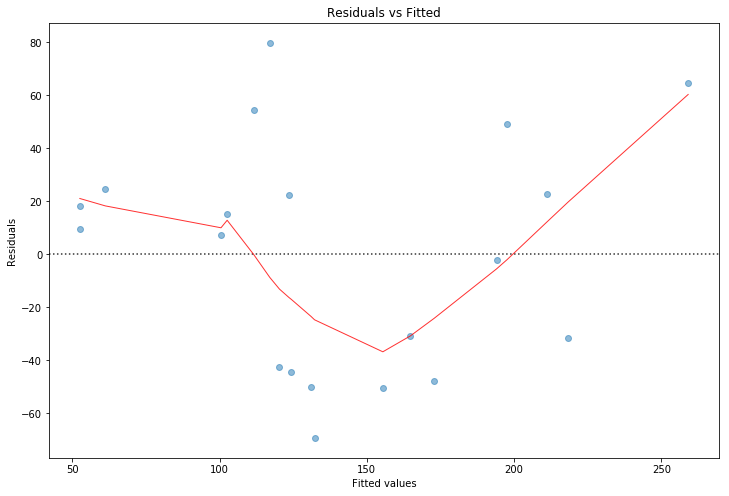

In [20]:
plot_lm_1 = plt.figure(1)
plot_lm_1.set_figheight(8)
plot_lm_1.set_figwidth(12)

plot_lm_1.axes[0] = sns.residplot(diabetes_y_pred, diabetes_y_test, 
                          lowess=True, 
                          scatter_kws={'alpha': 0.5}, 
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})


plot_lm_1.axes[0].set_title('Residuals vs Fitted')
plot_lm_1.axes[0].set_xlabel('Fitted values')
plot_lm_1.axes[0].set_ylabel('Residuals')



Residuals are defined as the difference between the predicted and the actual values. 

**Residual = Observed – Predicted**

The residual plot shows if residuals have non-linear patterns. There could be a non-linear relationship between predictor variables and an outcome variable and the pattern could show up in this plot if the model doesn’t capture the non-linear relationship. If you find equally spread residuals around a horizontal line without distinct patterns, that is a good indication you don’t have unexplained non-linear relationships.

Ideally, this plot shouldn’t show any pattern. But if you see any shape (curve, U shape), it suggests non-linearity in the data set. In addition, if you see a funnel shape pattern, it suggests your data is suffering from heteroskedasticity, i.e. the error terms have non-constant variance.

*Our residual plot here shows a trend with a U-like shape. Clearly, this indicates the model can be improved*

Some important trends and pointers on a residual plot:
1. **Points skewed across the Y-axis**
![Residual 1](https://wiki.mu-sigma.com/muwiki/images/9/92/Resid1.png)

**What it means**
The first plot (Predicted vs Actuals) shows us that the model in question here gives a lot of high predictions (for low actual values) while a few of the predictions are too low (the red and the yellow dots). On converting this into a residual plot, we see a skew on the positive scale of the Y-axis indicating high residuals for a few predictions. Some other predictions are way too low.

**How do we treat this?**
These residual plots normally mean you should either 1) transform the response variable to change the scale/ distribution of the same or 2) add more features that can explain the variance in your response variable to reduce errors (residuals) in predictions. 

2. **Funnel shaped plots**
![Residual 2](https://wiki.mu-sigma.com/muwiki/images/3/34/Resid2.png)

**What it means**
These plots exhibit “heteroscedasticity”, meaning that the residuals get larger as the prediction moves from small to large (or from large to small). This also means that the explained variance by the independent variables varies with the range of values of the response variable. In other words, your residuals are not normally distributed.

**How do we treat this?**
Heteroscedasticity often indicates the lack of a significant predictor variable in the dataset or the need for variable transformation. You should thus try the same suggestions as given above.

3. **Non-linear or U-shaped curves**
![Residual 3](https://wiki.mu-sigma.com/muwiki/images/4/48/Resid3.png)

**What it means**
These plots should correspond to a low r-squared value and an inaccurate model. It basically means that the current model (linear model) is unable to describe the non-linear patterns of the data.

**How do we treat this?**
A. Create a non-linear model (instead of a linear model)
B. Better feature-engineering (with polynomial features) should help
C. Transformation of the variables is another suggestion


References:
1. http://docs.statwing.com/interpreting-residual-plots-to-improve-your-regression/#outlier-header

Additional Reading Material:
1. https://www.hackerearth.com/blog/machine-learning/beginners-guide-regression-analysis-plot-interpretations/
2. Other diagnostic plots: https://data.library.virginia.edu/diagnostic-plots/
3. https://www.statsmodels.org/devel/examples/notebooks/generated/regression_plots.html
4. Implementation in Python: https://medium.com/@emredjan/emulating-r-regression-plots-in-python-43741952c034

# Classification (Supervised)

## Logistic Regression

A classification problem when independent variables are continuous in nature and dependent variable is in categorical form i.e. in classes like positive class and negative class.

Logistic Regression uses Sigmoid function. It is effective as it can deal well with outliers. The logistic function is a Sigmoid function, which takes any real value between zero and one. It is defined as:
*1/(1+e^(-t))*

If 't' as linear function in a univariate regression model of the form: *βo+ β1*x*;
the above logistic equation assumes this value of 't' and takes care of outliers when it encouters one.

To classify data into positive and negative classes, it uses the concept of decision boundary. A decsioon boundary can be linear or non-linear.
![Sigmoid](https://wiki.mu-sigma.com/muwiki/images/b/b6/Sigmoid.png)

**Gradient Descent in Logistic Regression**
In classification (using logistic regr.), the loss function is log loss. Log loss, short for logarithmic loss is a loss function for classification that quantifies the price paid for the inaccuracy of predictions in classification problems. Log loss penalizes false classifications by taking into account the probability of classification.

*Please note: The generic form of log loss is cross entropy. Cross entropy can be used for multi-class classification. Log Loss is defined for binary classification*

The objective of gradient descent in classification is to minimize this loss function.

Additional Reading Material:
1. https://medium.com/technology-nineleaps/logistic-regression-gradient-descent-optimization-part-1-ed320325a67e
2. https://medium.com/datadriveninvestor/understanding-the-log-loss-function-of-xgboost-8842e99d975d
3. https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
4. https://machinelearningmastery.com/logistic-regression-for-machine-learning/

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report

#split your dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

#build the model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
#use the above model to predict classes directly
y_pred = logreg.predict(X_test)

# for predicting probabilities: use predict_proba(X)
# for predicting Log of probability estimates: use predict_log_proba(X)

#accuracy and performance metrics
acc=logreg.score(X_test, y_test)

Package documentation:
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

### Confusion matrix (for binary classification) and related metrics
The confusion matrix is another metric that is often used to measure the performance of a classification algorithm. 
![Confusion Matrix](https://wiki.mu-sigma.com/muwiki/images/1/15/Conf_matrix.png)

The predicted classes are represented in the columns of the matrix, whereas the actual classes are in the rows of the matrix. We then have four cases:

1. True positives (TP): the cases for which the classifier predicted ‘spam’ and the emails were actually spam.
2. True negatives (TN): the cases for which the classifier predicted ‘not spam’ and the emails were actually real.
3. False positives (FP): the cases for which the classifier predicted ‘spam’ but the emails were actually real.
4. False negatives (FN): the cases for which the classifier predicted ‘not spam’ but the emails were actually spam.
In order to avoid confusion, note the following. ‘True’ or ‘false’ indicate if the classifier predicted the class correctly, whereas ‘positive’ or ‘negative’ indicate if the classifier predicted the desired class 

The key metrics derived from here are:
1. Sensitivity or Recall (True Positive Rate)= TP/(TP+FN)
2. Specificty (True Negative Rate)= TN/(TN+FP)
3. Precision= TP/(TP+FP)
4. Negative Prediction Value= TN/(TN+FN)
5. Fall-out or False Positive Rate= FP/(FP+TN)
6. F1-score: harmonic mean of precision and sensitivity= 2xTP/(FP+FN+2xTP)
7. Accuracy= (TP+TN)/(TP+TN+FP+FN)

Additional reading material:
1. https://medium.com/greyatom/performance-metrics-for-classification-problems-in-machine-learning-part-i-b085d432082b

In [ ]:
confusion_matrix = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))

### ROC curve and AUC
Receiver Operating Characteristic (ROC) metric is used to evaluate classifier output quality. ROC curves typically feature *true positive rate* on the Y axis, and *false positive rate* on the X axis. This means that the top left corner of the plot is the “ideal” point - a false positive rate of zero, and a true positive rate of one. This is not very realistic, but it does mean that **a larger area under the curve (AUC) is usually better.**

The “steepness” of ROC curves is also important, since it is ideal to maximize the true positive rate while minimizing the false positive rate.

![ROC curve](https://wiki.mu-sigma.com/muwiki/images/0/00/Roc.png)

In [ ]:
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test,  y_pred_proba)

# calculate AUC
auc = roc_auc_score(y_test,  y_pred_proba)
print('AUC: %.3f' % auc)

Like the *roc_curve()* function, the AUC function takes both the true outcomes (0,1) from the test set and the predicted probabilities for the 1 class. It returns the AUC score between 0.0 and 1.0 for no skill and perfect skill respectively.

Package documentation:
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve

### Precision-Recall Curves
A precision-recall curve shows the relationship between precision (= positive predictive value) and recall (= sensitivity) for every possible cut-off. The PRC is a graph with: 

• The **x-axis showing recall** (= sensitivity = TP / (TP + FN)) 
• The **y-axis showing precision** (= positive predictive value = TP / (TP + FP))

Thus every point on the PRC represents a chosen cut-off even though you cannot see this cut-off. What you can see is the precision and the recall that you will get when you choose this cut-off.

![PR Curve](https://wiki.mu-sigma.com/muwiki/images/7/7a/PRC.png)

In [ ]:
# calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)

**When to use ROC curves and Precision Recall curves**

Generally, the use of ROC curves and precision-recall curves are as follows:

ROC curves should be used when there are roughly equal numbers of observations for each class.
Precision-Recall curves should be used when there is a moderate to large class imbalance.

Additional reading material:
1. https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/
2. https://acutecaretesting.org/en/articles/precision-recall-curves-what-are-they-and-how-are-they-used

# Clustering

## Hierarchical Clustering
Clustering is a type of multivariate statistical analysis also known as cluster analysis or unsupervised classification analysis. It is based on a mathematical formulation of a measure of similarity.

Hierarchical clustering takes the idea of clustering a step further and imposes an ordering on the clusters themselves. It is the hierarchical decomposition of the data based on group similarities, which is often represented in a Dendogram.

There are two top-level methods for finding these hierarchical clusters:

**Agglomerative clustering** uses a bottom-up approach, wherein each data point starts in its own cluster. These clusters are then joined greedily, by taking the two most similar clusters together and merging them.
**Divisive clustering** uses a top-down approach, wherein all data points start in the same cluster. You can then use a parametric clustering algorithm like K-Means to divide the cluster into two clusters. For each cluster, you further divide it down to two clusters until you hit the desired number of clusters.
Both of these approaches rely on constructing a *similarity matrix* between all of the data points.

Let use see how to read a dendogram.

In [11]:
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

In [18]:
#random data generation
X = np.array([[5,3],  
    [10,15],
    [15,12],
    [24,10],
    [30,30],
    [85,70],
    [71,80],
    [60,78],
    [70,55],
    [80,91],])

Graph 1:


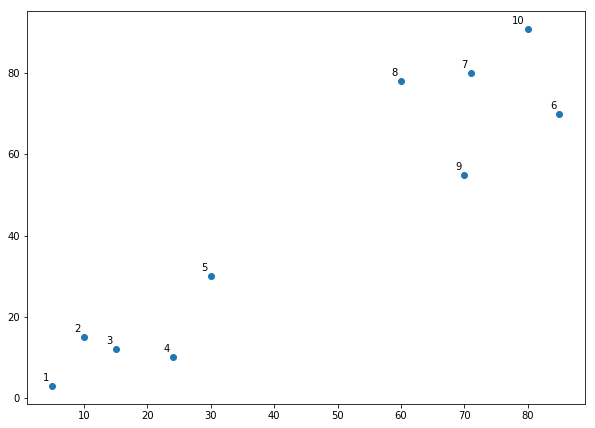

In [19]:
#representing data points in a scatter plot
labels = range(1, 11)  
plt.figure(figsize=(10, 7))  
plt.subplots_adjust(bottom=0.1)  
plt.scatter(X[:,0],X[:,1], label='True Position')
print("Graph 1:")
for label, x, y in zip(labels, X[:, 0], X[:, 1]):  
    plt.annotate(
        label,
        xy=(x, y), xytext=(-3, 3),
        textcoords='offset points', ha='right', va='bottom')
plt.show()  

Graph 2:


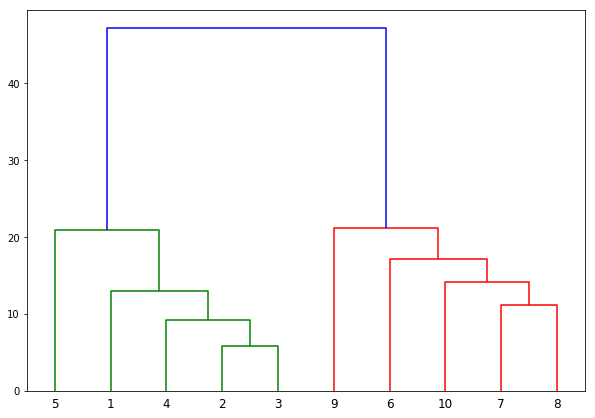

In [20]:
# creating the dendogram
linked = linkage(X, 'single')

labelList = range(1, 11)
print("Graph 2:")
plt.figure(figsize=(10, 7))  
dendrogram(linked,  
            orientation='top',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True)
plt.show()  

The algorithm starts by finding the two points that are closest to each other on the basis of *Euclidean distance*. (You can choose the distance metric). If we look back at Graph1, we can see that points 2 and 3 are closest to each other while points 7 and 8 are closes to each other. Therefore a cluster will be formed between these two points first. In Graph2, you can see that the dendograms have been created joining points 2 with 3, and 8 with 7. **The vertical height of the dendogram shows the Euclidean distances between points.** From Graph2, it can be seen that Euclidean distance between points 8 and 7 is greater than the distance between point 2 and 3.

The next step is to join the cluster formed by joining two points to the next nearest cluster or point which in turn results in another cluster. If you look at Graph1, point 4 is closest to cluster of point 2 and 3, therefore in Graph2 dendrogram is generated by joining point 4 with dendrogram of point 2 and 3. This process continues until all the points are joined together to form one big cluster.

Once one big cluster is formed, the longest vertical distance without any horizontal line passing through it is selected and a horizontal line is drawn through it. 

### Implementing Hierarchical clustering in Python (scikit)

**Pseudocode for Hierarchical Clustering**
1. Compute the distance matrix between each input data points.
2. Consider each data point as a cluster.
3. Repeat :
        A. Merge two closest clusters.
        B. Update the distance matrix.
4. Repeat step 3 until one single cluster remains.

**Some Important parameters to play around with**

*Linkage*
There are multiple methods to measure the distance between two clusters (i.e. linkage):
1. Single link distance (minimum or closest) 
2. Complete link distance (maximum)
3. Average link distance
4. Centroid distance (distance between centroids)
5. Ward’s distance

Additional reading material:
1. https://stepupanalytics.com/hierarchical-clustering-using-python-scipy/
2. https://www.dummies.com/programming/big-data/data-science/data-science-performing-hierarchical-clustering-with-python/

*Distance*
There are multiple distance calculating metrics. Some common ones are:
1. Euclidean (l1)
2. Manhattan (l2)
3. Cosine

In [32]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris

In [33]:
# load iris dataset
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris['feature_names'])
#print(X)
data = X[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)']]

**How to decide on number of clusters**

You can use several methods to arrive at the appropriate 'height' (h) or 'number of clusters' (k) for hierarchical clustering.

One popular method is the *elbow plot.* This uses k-means clustering on the dataset for a range of values of k (say, k from 1 to 10 in the examples above), and for each value of k calculate the sum of squared errors (SSE).

The idea is that we want a small SSE, but that the SSE tends to decrease toward 0 as we increase k (the SSE is 0 when k is equal to the number of data points in the dataset, because then each data point is its own cluster, and there is no error between it and the center of its cluster). So our goal is to choose a small value of k that still has a low SSE, and the elbow usually represents where we start to have diminishing returns by increasing k.


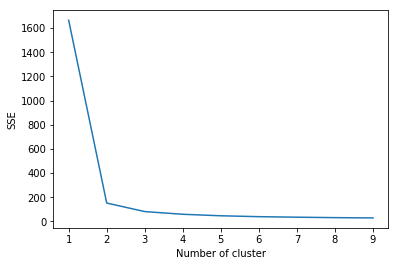

In [36]:
sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(X)
    X["clusters"] = kmeans.labels_
    #print(data["clusters"])
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()


In [35]:
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')  
cluster.fit_predict(data) 

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 0, 2, 0,
       2, 2, 2, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 2, 0, 2, 0, 0, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

Two arguments you can play around with are:

**Linkage** : {“ward”, “complete”, “average”, “single”}, optional (default=”ward”)
Which linkage criterion to use. The linkage criterion determines which distance to use between sets of observation. The algorithm will merge the pairs of cluster that minimize this criterion.

*Please Note:*
1. ward minimizes the variance of the clusters being merged.
2. average uses the average of the distances of each observation of the two sets.
3. complete or maximum linkage uses the maximum distances between all observations of the two sets.
4. single uses the minimum of the distances between all observations of the two sets.

**affinity**: Metric used to compute the linkage. Can be “euclidean”, “l1”, “l2”, “manhattan”, “cosine”, or ‘precomputed’. If linkage is “ward”, only “euclidean” is accepted.

In [22]:
print(cluster.labels_) 

[1 1 1 1 1 0 0 0 0 0]


Package Documentation:
https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html    

Additional Reading Material:
1. https://joernhees.de/blog/2015/08/26/scipy-hierarchical-clustering-and-dendrogram-tutorial/
2. https://stackabuse.com/hierarchical-clustering-with-python-and-scikit-learn/

### How to evaluate clusters

Evaluation of clusters is not as simple as evaluating the segments from a classification model. In particular any evaluation metric should not take the absolute values of the cluster labels into account but rather if this clustering define separations of the data similar to some ground truth set of classes or satisfying some assumption such that members belong to the same class are more similar that members of different classes according to some similarity metric.

Some commonly used metrics used to evaluate clusters are:
1. Adjusted Rand Index
2. Silhouette Coefficient
3. Adjusted Mutual Information Score/ Normalized Mutual Information Score

There are several other measures as well which you can study here: https://scikit-learn.org/stable/modules/clustering.html#clustering-performance-evaluation

#### Adjusted Rand Index
*Rand Index* is a measure of the similarity between two data clusterings. Say, you have an external classifying criterion (reliable) and you want to compare your clustering model against the same, or when you want to compare results from 2 clustering models, Rand Index can help you do that:

Say you have two sets of clustering results mapped to your dataset S: X= {X1, X2,...Xr} and Y= {Y1, Y2,...,Ys}. There are 4 possible outcomes:
1. a, the number of pairs of elements in S that are in the same subset in X and in the same subset in Y
2. b, the number of pairs of elements in S that are in different subsets in X and in different subsets in Y
3. c, the number of pairs of elements in S that are in the same subset in X and in different subsets in Y
4. d, the number of pairs of elements in S that are in different subsets in X and in the same subset in Y

Then, the Rand Index is:
![Rand Index](https://wiki.mu-sigma.com/muwiki/images/0/07/Rand_ind.png)
where n-> total number of records. Here, *a+b are he number of agreements* and *c+d are the number of disagreements* among X and Y.

However, the Rand Index has a few flaws. The expected value of the Rand index of two random partitions does
not take a constant value (say zero).

The adjusted Rand Index takes into the possibility of randomness and the formula looks like the following:
![ARI1](https://wiki.mu-sigma.com/muwiki/images/1/1f/ARI1.png)
This can also be represented as:
![ARI2](https://wiki.mu-sigma.com/muwiki/images/f/f2/ARI2.png)

Let's also cover the **contingency table** for the same:
A contingency table (also known as a cross tabulation or crosstab) is a type of table in a matrix format that displays the (multivariate) frequency distribution of the variables. It is used in clustering to check for association rules.
(Additional reading: https://en.wikipedia.org/wiki/Contingency_table)
For our example, it looks like this:
![contingency table](https://wiki.mu-sigma.com/muwiki/images/9/94/Contingency_table.png)

Given the knowledge of the ground truth class assignments *labels_true* and our clustering algorithm assignments of the same samples *labels_pred*, the adjusted Rand index is a function that measures the similarity of the two assignments, ignoring permutations and with chance normalization:

In [23]:
from sklearn import metrics

In [24]:
labels_true = [0, 0, 0, 1, 1, 1]
labels_pred = [0, 0, 1, 1, 2, 2]

#obtain the ARI
metrics.adjusted_rand_score(labels_true, labels_pred)

0.24242424242424246

In [25]:
#Perfect labeling is scored 1.0
######################################## Example ###############################################
labels_pred = labels_true[:]
print( 'Perfect labelling ARI:',metrics.adjusted_rand_score(labels_true, labels_pred))

#Bad (e.g. independent labelings) have negative or close to 0.0 scores
######################################## Example ###############################################
labels_true = [0, 1, 2, 0, 3, 4, 5, 1]
labels_pred = [1, 1, 0, 0, 2, 2, 2, 2]
print('Independent labelling ARI:',metrics.adjusted_rand_score(labels_true, labels_pred))

Perfect labelling ARI: 1.0
Independent labelling ARI: -0.12903225806451613


**Advantages**
Random (uniform) label assignments have a ARI score close to 0.0 for any value of n_clusters and n_samples (which is not the case for raw Rand index or the V-measure for instance).
Bounded range [-1, 1]: negative values are bad (independent labelings), similar clusterings have a positive ARI, 1.0 is the perfect match score.
No assumption is made on the cluster structure: can be used to compare clustering algorithms such as k-means which assumes isotropic blob shapes with results of spectral clustering algorithms which can find cluster with “folded” shapes.
The adjusted_rand_score is symmetric: swapping the argument does not change the score. It can thus be used as a consensus measure

**Drawbacks**
Contrary to inertia, ARI requires knowledge of the ground truth classes while is almost never available in practice or requires manual assignment by human annotators (as in the supervised learning setting).

Additional Reading Material:
http://faculty.washington.edu/kayee/pca/supp.pdf

#### Silhouette Score
One drawback of the Rand Index is that you might need the ground truth or a reliable reference. Since you cannot get the ground reality most of the times, we have an alternate metric. 

The Silhouette Coefficient is an example of such an evaluation, where a higher Silhouette Coefficient score relates to a model with better defined clusters. The Silhouette Coefficient is defined for each sample and is composed of two scores:

a: The mean distance between a sample and all other points in the same class.
b: The mean distance between a sample and all other points in the next nearest cluster.
The Silhouette Coefficient 's' for a single sample is then given as:
![Sil Index](https://wiki.mu-sigma.com/muwiki/images/6/6f/Sil_ind.png)

Hence, silhouette coefficient can range in values between :
**-1<=s<=1**

For *'s'* to be close to 1 we require *'a<<b'*. As *'a'* is a measure of how dissimilar a point *'i'* is to its own cluster, a small value of 'a' means it is well matched. Furthermore, a large *'b'* implies that *'i'* is badly matched to its neighbouring cluster. **Thus an *'s'* close to one means that the data is appropriately clustered**. 

If *'s'* is close to negative one, then by the same logic we see that *'i'* would be more appropriate if it was clustered in its neighbouring cluster. 

An *'s'* near zero means that the datum is on the border of two natural clusters.

In [28]:
from sklearn.metrics import pairwise_distances
from sklearn import datasets
from sklearn.cluster import KMeans

In [27]:
dataset = datasets.load_iris()
X = dataset.data
y = dataset.target

In [29]:
kmeans_model = KMeans(n_clusters=3, random_state=1).fit(X)
labels = kmeans_model.labels_

# obtain the silhouette score
metrics.silhouette_score(X, labels, metric='euclidean')

0.5525919445213676

**Advantages**
The score is bounded between -1 for incorrect clustering and +1 for highly dense clustering. Scores around zero indicate overlapping clusters.
The score is higher when clusters are dense and well separated, which relates to a standard concept of a cluster.


**Drawbacks**
The Silhouette Coefficient is generally higher for convex clusters than other concepts of clusters, such as density based clusters like those obtained through DBSCAN.